In [201]:
#s0 libs

using DelimitedFiles
using Plots
using StatsBase
using Test

#s1 config

function get_limit()
    limit   = 2
    return limit
end

function get_xs()
    ticks   = 10
    xs      = [float(x) for x in collect(1:ticks)]
    return xs
end

#s2 model

function operate_on(xs::Array{Float64,1})
    ys = [maximum(xs)-x^2 for x in xs]
    return ys
end

#s3 in out
function get_durations()
    output_matrix = readdlm("durations.txt", ' ', Float64, '\n')
    durations     = output_matrix[1,:]
    return durations
end

#s6 main

function harry_main()
    #xs = get_xs()
    #ys = operate_on(xs)
    #scatter(xs, ys)

    durations   = get_durations()
    limit       = get_limit()
    println("analysis limited to ", limit, " days.")
    
    limited     = [d for d in durations if d<=limit]
    cardinal    = 1:length(limited)
    scat_abs    = scatter(cardinal, limited, alpha=0.02, title="sorted durations of seclusions up to limit", legend=false)
    
    log_abs     = [log2(d) for d in limited]
    scat_logs    = scatter(cardinal, log_abs, alpha=0.02, title="logs of sorted durations of seclusions up to limit", legend=false)
    
    count_durs  = collect(countmap(limited))
    durs        = [x[1] for x in count_durs]
    freqs       = [log2(x[2]) for x in count_durs]
    scat_freqs  = scatter(durs, freqs, alpha=0.25, title="scatter of frequencies of durations", legend=false)
    
    minutes     = limit*24*60
    blockiness  = 2
    blocks::Int = minutes/blockiness
    hist_freqs  = histogram(durs, bins=blocks, alpha=0.5)
    
    return scat_abs, scat_logs, scat_freqs, hist_freqs
end

scat_abs, scat_logs, scat_freqs, hist_freqs = harry_main();

analysis limited to 2 days.


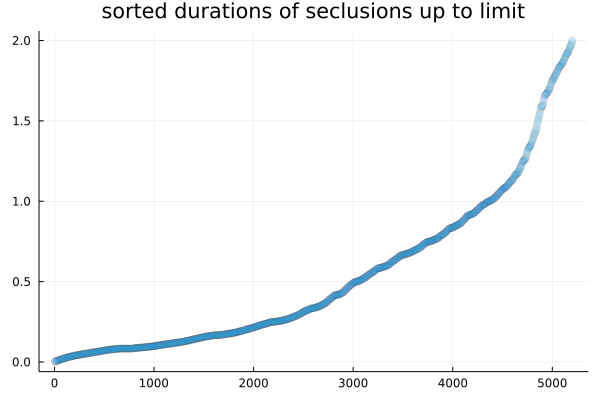

In [202]:
scat_abs

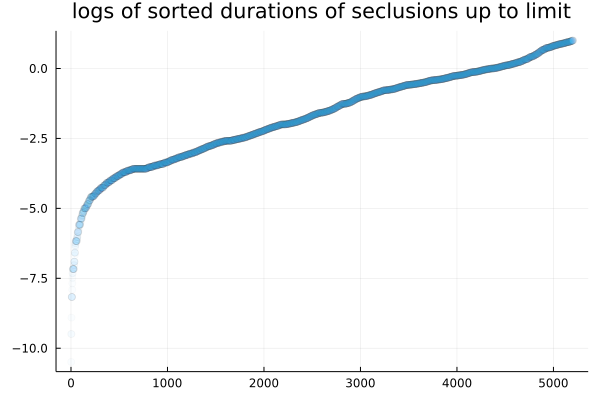

In [203]:
scat_logs

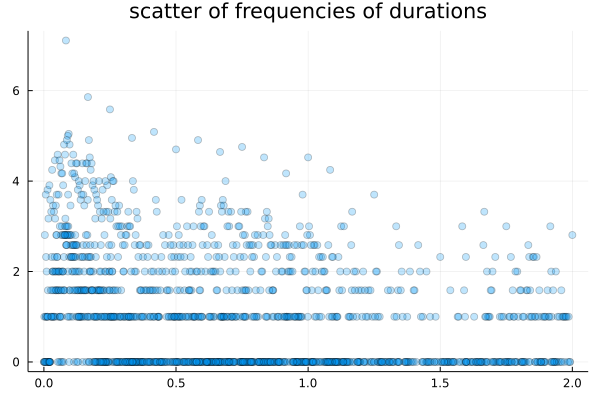

In [204]:
scat_freqs

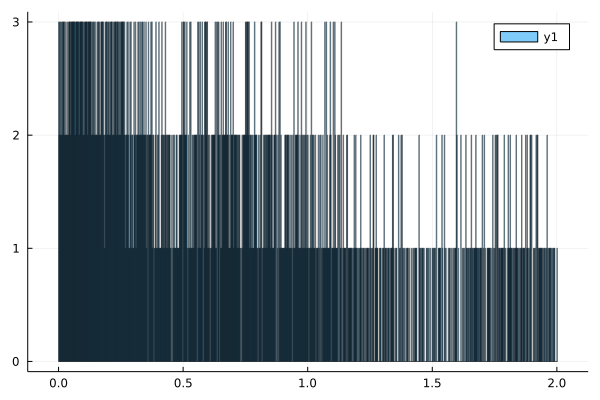

In [205]:
hist_freqs

In [206]:
#s7 tests

function test_operate_on()
    xs = get_xs()
    ys = operate_on(xs)
    @test typeof(ys) == Array{Float64,1}
    println("passed type testing for operate on")
end

function harry_tests()
    test_operate_on()
end

harry_tests()

passed type testing for operate on
